## Import modules and data

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from titeseq_functions import *
from multiprocessing import Pool
from functools import partial
from collections import Counter

In [19]:
#get raw data (with only relevant columns)
fit_data_save_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/fit_data/'
binary_data = pd.read_csv(fit_data_save_location+'binary_jbkinney2016.csv')
binary_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,511.0,120.0,128.0,1.0,1143.0
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,80.0,1.0,250.0,0.0,3.0,70.0
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,268.0,1.0,752.0,1.0,104.0,141.0
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,110.0,0.0,2052.0,0.0,122.0,13.0
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,1.0,262.0,3.0,0.0,99.0
...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,213.0,800.0,0.0,66.0,2.0
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,79.0,0.0,177.0,34.0,170.0
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,0.0,0.0,0.0,0.0,0.0
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,71.0,170.0,479.0,256.0,11.0,395.0


## Test function in titeseq_functions for automatic dataset generation

### test with duplicates treated as additonal data points

In [3]:
test = binary_data[['CDR1H_AA','CDR3H_AA','fluorescein10^-8bin0_A','fluorescein10^-8bin3_A','fluorescein10^-8bin0_B','fluorescein10^-8bin3_B','fluorescein10^-8bin0_C','fluorescein10^-8bin3_C']]
test.index = test['CDR1H_AA'] + '_' + test['CDR3H_AA']
test = test.drop(columns=['CDR1H_AA','CDR3H_AA'])
test = test.rename(columns={'fluorescein10^-8bin0_A':'low_A','fluorescein10^-8bin3_A':'high_A','fluorescein10^-8bin0_B':'low_B','fluorescein10^-8bin3_B':'high_B','fluorescein10^-8bin0_C':'low_C','fluorescein10^-8bin3_C':'high_C'})
test.index.name = 'sequence'

In [4]:
positive,negative = generateBinaryDataset(test,data_type='duplicated',replicate_cutoff=(2,2),percentile_cutoff=(0.8,0.2),zero_tolerance=True)

In [5]:
positive

,mean
sequence,
KYSDYWMNWV_GSYYGMDYWG,137.101548
KFSDYWKNWV_GSYYGMDYWG,7.651430
KFSDYWMNRV_GSYYGMDYWG,9.107354
KFSDYWMNWV_GSYYGMDYWG,107.827854
KFIDYWMNWV_GSYYGMDYWG,45.526543
...,...
LFSDYWMNWQ_GSYYGMDYWG,13.972124
LFSGYWMNWV_GSYYGMDYWG,43.109552
FFSDYWMNWV_GSYYGMDYWG,2.397841


In [6]:
negative

,mean
sequence,
NFSDYWENWL_GSYYGMDYWG,0.0
TTSDYWMNDV_GSYYGMDYWG,0.0
TISDGWMNWV_GSYYGMDYWG,0.0
TISDYWMRWV_GSYYGMDYWG,0.0
TQSDYWMNTV_GSYYGMDYWG,0.0
...,...
GRSDKWMNWV_GSYYGMDYWG,0.0
GFSDYWPTWV_GSYYGMDYWG,0.0
GFSDYWMNNV_GSYYGMDYWG,0.0


In [7]:
positive.index.intersection(negative.index) #should be no sequences in common!

Index([], dtype='object', name='sequence')

### test with duplicates removed (not the best approach)

In [8]:
#test all-in-one-function for ratio generation
test = binary_data[['CDR1H_AA','CDR3H_AA','fluorescein10^-8bin0_A','fluorescein10^-8bin3_A','fluorescein10^-8bin0_B','fluorescein10^-8bin3_B','fluorescein10^-8bin0_C','fluorescein10^-8bin3_C']]
test.index = test['CDR1H_AA'] + '_' + test['CDR3H_AA']
test = test.drop(columns=['CDR1H_AA','CDR3H_AA'])
test = test.rename(columns={'fluorescein10^-8bin0_A':'low_A','fluorescein10^-8bin3_A':'high_A','fluorescein10^-8bin0_B':'low_B','fluorescein10^-8bin3_B':'high_B','fluorescein10^-8bin0_C':'low_C','fluorescein10^-8bin3_C':'high_C'})
test.index.name = 'index'
test.loc[test.index.duplicated()]

,low_A,high_A,low_B,high_B,low_C,high_C
index,,,,,,
KFSDYWMNWV_GSYYGMDYWG,1.0,1165.0,249.0,598.0,0.0,1027.0
NFSDYWMNWV_GSYYGMDYWG,45.0,1812.0,1036.0,538.0,28.0,3064.0
TFSDYWMNWV_GSYYGMDYWG,55.0,9889.0,1992.0,4132.0,179.0,14803.0
TFSDYWMNWV_GSYYGMDYWG,218.0,16002.0,4033.0,7056.0,366.0,22782.0
TKSDYWMNWV_GSYYGMDYWG,180.0,1.0,58.0,2.0,62.0,10.0
...,...,...,...,...,...,...
CFSDYWMNWV_GSYYGMDYWG,26.0,311.0,31.0,818.0,4.0,360.0
LFSDYWMNWV_GSYYGMDYWG,2.0,1211.0,4.0,677.0,3.0,1186.0
LFSDYWMNWV_GSYYGMDYWG,0.0,818.0,717.0,729.0,2.0,1284.0


In [9]:
test.index.value_counts()

TFSDYWMNWV_GSYYGMDYWG    34
TFSDSWMNWV_GSYYGMDYWG     6
TFSDRWMNWV_GSYYGMDYWG     6
TFSDYWMNWV_GSYYGSDYWG     6
TFSDYWMNWV_GSYYGRDYWG     6
                         ..
TFSDYWMNWV_GSYYGMHAWG     1
TFSDYWMNWV_WSYYGMFYWG     1
TFSDYWMNWV_KSYYGMVYWG     1
TFSDYWMNWV_GSYYGAVYWG     1
FFSDYWMCWV_GSYYGMDYWG     1
Name: index, Length: 2807, dtype: int64

In [10]:
test= test[~test.index.duplicated(keep='first')] #duplicates due to degenerate codons
test

,low_A,high_A,low_B,high_B,low_C,high_C
index,,,,,,
KYSDYWMNWV_GSYYGMDYWG,0.0,511.0,120.0,128.0,1.0,1143.0
KCSDYWMNWV_GSYYGMDYWG,80.0,1.0,250.0,0.0,3.0,70.0
KFSDYDMNWV_GSYYGMDYWG,268.0,1.0,752.0,1.0,104.0,141.0
KFSDYSMNWV_GSYYGMDYWG,110.0,0.0,2052.0,0.0,122.0,13.0
KFSDYWKNWV_GSYYGMDYWG,0.0,1.0,262.0,3.0,0.0,99.0
...,...,...,...,...,...,...
FFSAYWMNWV_GSYYGMDYWG,0.0,2.0,663.0,0.0,14.0,8.0
LFSDYWDNWV_GSYYGMDYWG,64.0,0.0,117.0,0.0,9.0,1.0
FFTDYWMNWV_GSYYGMDYWG,0.0,79.0,0.0,177.0,34.0,170.0


In [11]:
positive,negative = generateBinaryDataset(test,data_type='nonduplicated',replicate_cutoff=(2,2),percentile_cutoff=(0.8,0.2),zero_tolerance=True)

In [12]:
positive

,mean
index,
KYSDYWMNWV_GSYYGMDYWG,581.050872
KCSDYWMNWV_GSYYGMDYWG,6.940998
KFSDYWKNWV_GSYYGMDYWG,29.926329
KFSDYWMNRV_GSYYGMDYWG,28.829274
KFSDYWMNWV_GSYYGMDYWG,108.048227
...,...
CFIDYWMNWV_GSYYGMDYWG,129.160503
LFSDYWMNWQ_GSYYGMDYWG,54.644417
LFSGYWMNWV_GSYYGMDYWG,205.414392


In [13]:
negative

,mean
index,
NFSDYWENWL_GSYYGMDYWG,0.0
TTSDYWMNDV_GSYYGMDYWG,0.0
TISDGWMNWV_GSYYGMDYWG,0.0
TISDYWMRWV_GSYYGMDYWG,0.0
TQSDYWMNTV_GSYYGMDYWG,0.0
...,...
GRSDKWMNWV_GSYYGMDYWG,0.0
GFSDYWPTWV_GSYYGMDYWG,0.0
GFSDYWMNNV_GSYYGMDYWG,0.0


# This next section breaks down the dataset generation that was automated in the previous section

## merge duplicate sequences before analysis

In [24]:
#preprocess NGS read counts - get ratio of positive to negative 
replicates = ['A','B','C']
negative_column = 'fluorescein10^-8bin0_'
positive_column = 'fluorescein10^-8bin3_'

for r in replicates:
    #normalize read counts for each pool
    binary_data[positive_column+r] = binary_data[positive_column+r]/binary_data[positive_column+r].sum(axis=0)
    binary_data[negative_column+r] = binary_data[negative_column+r]/binary_data[negative_column+r].sum(axis=0)
    binary_data['ratio_' + r] = np.where(binary_data[negative_column+r] == 0, binary_data[positive_column+r] / (binary_data[binary_data[negative_column+r] != 0][negative_column+r].min(axis=0)), binary_data[positive_column+r] / binary_data[negative_column+r])

binary_data.index = binary_data['CDR1H_AA']+'_'+binary_data['CDR3H_AA']
binary_data.index.name = 'sequence'
binary_data=binary_data.drop(['CDR1H_AA','CDR3H_AA'],axis=1)
binary_data

,CDR1H,CDR3H,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C
sequence,,,,,,,,,,,
KYSDYWMNWV_GSYYGMDYWG,AAATATAGTGACTACTGGATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000000,1.762538e-04,0.000027,9.560958e-05,0.000001,2.761591e-04,146.436379,3.606048,261.262216
KCSDYWMNWV_GSYYGMDYWG,AAATGCAGTGACTACTGGATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000096,3.449193e-07,0.000055,0.000000e+00,0.000003,1.691263e-05,0.003582,0.000000,5.333437
KFSDYDMNWV_GSYYGMDYWG,AAATTTAGTGACTACGACATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000323,3.449193e-07,0.000166,7.469498e-07,0.000110,3.406687e-05,0.001069,0.004496,0.309896
KFSDYSMNWV_GSYYGMDYWG,AAATTTAGTGACTACTCAATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000132,0.000000e+00,0.000453,0.000000e+00,0.000129,3.140917e-06,0.000000,0.000000,0.024356
KFSDYWKNWV_GSYYGMDYWG,AAATTTAGTGACTACTGGAAGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000000,3.449193e-07,0.000058,2.240849e-06,0.000000,2.391929e-05,0.286568,0.038710,22.629011
...,...,...,...,...,...,...,...,...,...,...,...
FRSDYWMNWV_GSYYGMDYWG,TTTCGGAGTGACTACTGGATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000152,7.346781e-05,0.000177,0.000000e+00,0.000070,4.832180e-07,0.484437,0.000000,0.006927
FFTDYWMNWV_GSYYGMDYWG,TTTTTTACTGACTACTGGATGAACTGGGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000000,2.724862e-05,0.000000,1.322101e-04,0.000036,4.107353e-05,22.638892,598.378640,1.142879
FFSDYWMNHV_GSYYGMDYWG,TTTTTTAGTGACTACTGGATGAACCACGTC,ACCCCAGTAGTCCATACCATAGTAAGAACC,0.000152,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000


Text(0.5, 0, 'Protein number in dataset')

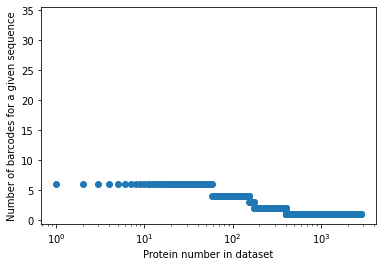

In [32]:
c = Counter(list(zip(binary_data.index)))
duplicated_values = pd.DataFrame(index=range(len(c.values())),data=c.values())
duplicated_values = duplicated_values.sort_values(by=[0],ascending=False)
plt.scatter(range(len(duplicated_values)),duplicated_values[0])
plt.xscale('log')
plt.ylabel('Number of barcodes for a given sequence')
plt.xlabel('Protein number in dataset')

In [25]:
#group barcodes together for stat calculations more generally
df1 = pd.DataFrame(index=binary_data.index.unique(),columns=binary_data.columns)
binary_data['ratios'] = binary_data[['ratio_' + r for r in replicates]].values.tolist()
df1['ratios'] = binary_data.groupby('sequence')['ratios'].apply(lambda x: list([item for sublist in x for item in sublist]))
df1 = df1.drop(columns=df1.columns[:-1])
df1

,ratios
sequence,
KYSDYWMNWV_GSYYGMDYWG,"[146.436379120104, 3.6060483017597638, 261.262..."
KCSDYWMNWV_GSYYGMDYWG,"[0.003582103207438943, 0.0, 5.333436903049645]"
KFSDYDMNWV_GSYYGMDYWG,"[0.001069284539534013, 0.004495572184707153, 0..."
KFSDYSMNWV_GSYYGMDYWG,"[0.0, 0.0, 0.024356444873411726]"
KFSDYWKNWV_GSYYGMDYWG,"[0.2865682565951155, 0.038709965071371505, 22...."
...,...
FFSAYWMNWV_GSYYGMDYWG,"[0.573136513190231, 0.0, 0.13061478129917498]"
LFSDYWDNWV_GSYYGMDYWG,"[0.0, 0.0, 0.025397318585950693]"
FFTDYWMNWV_GSYYGMDYWG,"[22.63889227101412, 598.3786400732608, 1.14287..."


In [36]:
#calculate stats
df1['ratios'] = df1['ratios'].apply(lambda x: [i for i in x if not np.isnan(i)])
df1['mean'] = df1['ratios'].apply(lambda x: np.nanmean(x))
df1['count'] = df1['ratios'].apply(lambda x: len(x))
df1['std'] = df1['ratios'].apply(np.std)
df1['min'] = df1['ratios'].apply(min)
df1['max'] = df1['ratios'].apply(max)
df1.sort_values('count',ascending=False)

,ratios,mean,count,std,min,max
sequence,,,,,,
TFSDYWMNWV_GSYYGMDYWG,"[6.057531911226931, 3.8451612691375323, 30.711...",25.630412,102,63.169205,1.605163,459.246100
TFSDSWMNWV_GSYYGMDYWG,"[0.23423840104296395, 1.1137254903945533, 0.51...",4.371476,18,13.864685,0.000000,61.335018
TFSDYWMNWS_GSYYGMDYWG,"[1.4328412829755774, 0.3756300314333087, 131.6...",14.701561,18,31.582550,0.000000,131.659700
TFSDYWMNRV_GSYYGMDYWG,"[0.011696663534494509, 0.6761340565799557, 0.2...",2.794998,18,5.721616,0.000000,21.492619
TFSDYWMNSV_GSYYGMDYWG,"[1.074630962231683, 1.4488586926713338, 1.8286...",2.534983,18,3.713747,0.005909,14.400280
...,...,...,...,...,...,...
TFSDYWRNWW_GSYYGMDYWG,"[0.0, 0.0]",0.000000,2,0.000000,0.000000,0.000000
TFGDYWRNWV_GSYYGMDYWG,"[0.0, 0.0]",0.000000,2,0.000000,0.000000,0.000000
TFFDYWENWV_GSYYGMDYWG,"[0.0, 0.0]",0.000000,2,0.000000,0.000000,0.000000


Text(0, 0.5, 'positive:negative average ratio')

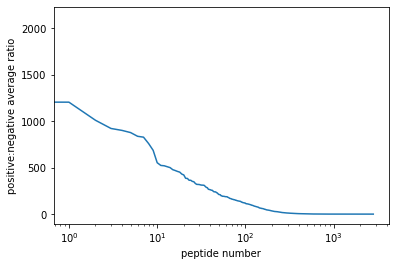

In [37]:
plt.plot(range(len(df1)),df1['mean'].sort_values(ascending=False))
plt.xscale('log')
plt.xlabel('peptide number')
plt.ylabel('positive:negative average ratio')

## treat duplicates sequences independently

### convert read counts to frequencies

In [37]:
#preprocess NGS read counts - get ratio of positive to negative 
replicates = ['A','B','C']
negative_column = 'fluorescein10^-8bin0_'
positive_column = 'fluorescein10^-8bin3_'

for r in replicates:
    #normalize read counts for each pool
    binary_data[positive_column+r] = binary_data[positive_column+r]/binary_data[positive_column+r].sum(axis=0)
    binary_data[negative_column+r] = binary_data[negative_column+r]/binary_data[negative_column+r].sum(axis=0)
    binary_data['ratio_' + r] = np.where(binary_data[negative_column+r] == 0, binary_data[positive_column+r] / (binary_data[binary_data[negative_column+r] != 0][negative_column+r].min(axis=0)), binary_data[positive_column+r] / binary_data[negative_column+r])

In [38]:
binary_data.head()

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.762538e-04,0.000027,9.560958e-05,0.000001,0.000276,146.436379,3.606048,261.262216
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000096,3.449193e-07,0.000055,0.000000e+00,0.000003,0.000017,0.003582,0.000000,5.333437
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000323,3.449193e-07,0.000166,7.469498e-07,0.000110,0.000034,0.001069,0.004496,0.309896
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000132,0.000000e+00,0.000453,0.000000e+00,0.000129,0.000003,0.000000,0.000000,0.024356
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.449193e-07,0.000058,2.240849e-06,0.000000,0.000024,0.286568,0.038710,22.629011


### what's the distribution of ratios like in the Kinney dataset?

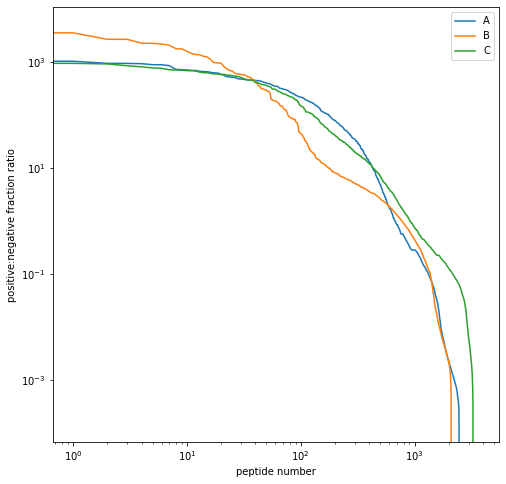

In [39]:
#plot distribution of ratios. where should we draw the cutoff for positive clones?
fig,ax = plt.subplots(figsize=(8,8))
for r in replicates:
    ax.plot(range(len(binary_data)),binary_data['ratio_'+r].sort_values(ascending=False),label=r)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('peptide number')
ax.set_ylabel('positive:negative fraction ratio')
ax.legend()

### are the ratios correlated?

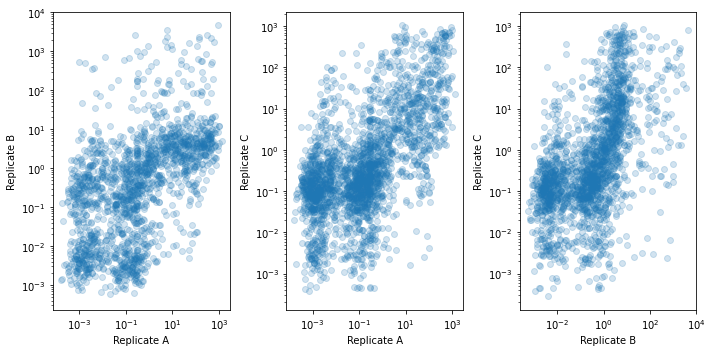

In [40]:
#do the positive clones overlap? (are the same for each of the three replicates?)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
for i,ax in enumerate(np.ravel(axes)):
    if i == 0:
        col1 = 'A'
        col2 = 'B'
    elif i == 1:
        col1 = 'A'
        col2 = 'C'
    else:
        col1 = 'B'
        col2 = 'C'
        
    x = binary_data['ratio_'+col1]
    y = binary_data['ratio_'+col2]
    plot_data = pd.concat((x,y),join='outer',axis=1)
    ax.scatter(plot_data['ratio_'+col1],plot_data['ratio_'+col2],alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Replicate ' + col1)
    ax.set_ylabel('Replicate ' + col2)
plt.tight_layout()

### how large is the dataset if you apply various cutoffs to it (based on # of replicates and the percentile of ratio)?
### in this analysis, each replicate is treated independently (not grouped like in the automated section) 

Text(0.5, 1.0, 'size of positive dataset')

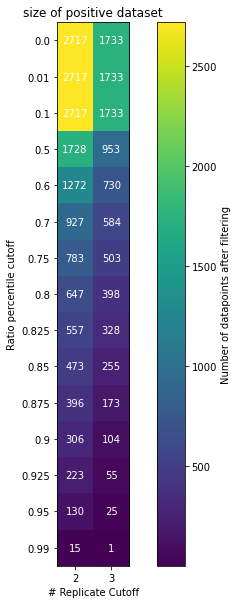

In [41]:
#set some stringencies for cutoffs and see how large the positive dataset is
cutoff_percentiles = [0,0.01,0.1,0.5,0.6,0.7,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.99]
number_of_replicates = [2,3]
datasize_df = pd.DataFrame(index=cutoff_percentiles,columns=number_of_replicates)

for i,n in enumerate(number_of_replicates):
    for j,c in enumerate(cutoff_percentiles):
        data_slice = binary_data[['ratio_A','ratio_B','ratio_C']]
        data_slice = binary_data.loc[((data_slice['ratio_A'] > data_slice['ratio_A'].quantile(c)).astype(int) + \
                      (data_slice['ratio_B'] > data_slice['ratio_B'].quantile(c)) + \
                     (data_slice['ratio_C'] > data_slice['ratio_C'].quantile(c))) > (n-1)]
        l = len(data_slice)
        datasize_df.loc[c,n] = l
        # print(f"Number of replicates is: {n}. Percentile cutoff is: {c}. Length of dataset is: {l}")

#plot results
fig,ax = plt.subplots(figsize=(10,10))
pos = ax.imshow(datasize_df.values.astype('int'))
xticks = range(len(datasize_df.columns))
yticks = range(len(datasize_df.index))
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(datasize_df.columns)
ax.set_yticklabels(datasize_df.index)
ax.set_xlabel('# Replicate Cutoff')
ax.set_ylabel('Ratio percentile cutoff')
cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('Number of datapoints after filtering')
for (i, j), z in np.ndenumerate(datasize_df):
    ax.text(j, i, str(z), ha='center', va='center',color='white')
plt.title('size of positive dataset')

In [42]:
#look at the sequences after choosing a filter
c = 0.8 #quantile cut-off
n = 2 #number of replicates cut-off
data_slice = binary_data.loc[((binary_data['ratio_A'] > binary_data['ratio_A'].quantile(c)).astype(int) + \
                      (binary_data['ratio_B'] > binary_data['ratio_B'].quantile(c)) + \
                     (binary_data['ratio_C'] > binary_data['ratio_C'].quantile(c))) > (n-1)]
data_slice[['CDR1H_AA','CDR3H_AA']]

,CDR1H_AA,CDR3H_AA
0,KYSDYWMNWV,GSYYGMDYWG
5,KFSDYWMNRV,GSYYGMDYWG
8,KFSDYWMNWV,GSYYGMDYWG
9,KFIDYWMNWV,GSYYGMDYWG
14,NFSDYWMNWV,GSYYGMDYWG
...,...,...
3666,LFSGYWMNWV,GSYYGMDYWG
3672,FFSDYWMNWC,GSYYGMDYWG
3675,LFSDYWMNWV,GSYYGMDYWG
3678,FFTDYWMNWV,GSYYGMDYWG


Text(0.5, 1.0, 'size of negative dataset')

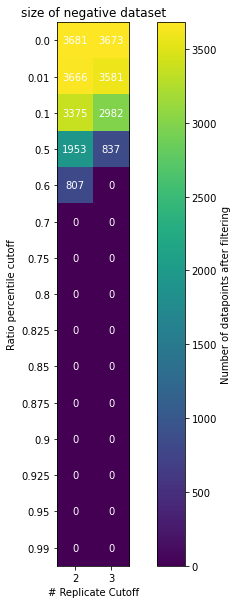

In [43]:
#set some stringencies for cutoffs and see how large the negative dataset is
cutoff_percentiles = [0,0.01,0.1,0.5,0.6,0.7,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.99]
number_of_replicates = [2,3]
datasize_df = pd.DataFrame(index=cutoff_percentiles,columns=number_of_replicates)

for i,n in enumerate(number_of_replicates):
    for j,c in enumerate(cutoff_percentiles):
        data_slice = binary_data[['ratio_A','ratio_B','ratio_C']]
        data_slice = binary_data.loc[((data_slice['ratio_A'] < data_slice['ratio_A'].quantile(1-c)).astype(int) + \
                      (data_slice['ratio_B'] < data_slice['ratio_B'].quantile(1-c)) + \
                     (data_slice['ratio_C'] < data_slice['ratio_C'].quantile(1-c))) > (n-1)]
        l = len(data_slice)
        datasize_df.loc[c,n] = l
        # print(f"Number of replicates is: {n}. Percentile cutoff is: {c}. Length of dataset is: {l}")

#plot results
fig,ax = plt.subplots(figsize=(10,10))
pos = ax.imshow(datasize_df.values.astype('int'))
xticks = range(len(datasize_df.columns))
yticks = range(len(datasize_df.index))
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(datasize_df.columns)
ax.set_yticklabels(datasize_df.index)
ax.set_xlabel('# Replicate Cutoff')
ax.set_ylabel('Ratio percentile cutoff')
cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('Number of datapoints after filtering')
for (i, j), z in np.ndenumerate(datasize_df):
    ax.text(j, i, str(z), ha='center', va='center',color='white')
plt.title('size of negative dataset')

In [44]:
#look at the sequences after choosing a filter
c = 0.01 #quantile cut-off
n = 2 #number of replicates cut-off
data_slice = binary_data.loc[((binary_data['ratio_A'] < binary_data['ratio_A'].quantile(1-c)).astype(int) + \
                      (binary_data['ratio_B'] < binary_data['ratio_B'].quantile(1-c)) + \
                     (binary_data['ratio_C'] < binary_data['ratio_C'].quantile(1-c))) > (n-1)]
data_slice[['CDR1H_AA','CDR3H_AA']]

,CDR1H_AA,CDR3H_AA
0,KYSDYWMNWV,GSYYGMDYWG
1,KCSDYWMNWV,GSYYGMDYWG
2,KFSDYDMNWV,GSYYGMDYWG
3,KFSDYSMNWV,GSYYGMDYWG
4,KFSDYWKNWV,GSYYGMDYWG
...,...,...
3677,FRSDYWMNWV,GSYYGMDYWG
3678,FFTDYWMNWV,GSYYGMDYWG
3679,FFSDYWMNHV,GSYYGMDYWG
3680,FFSDYWMNWV,GSYYGMDYWG


### now, do the same analysis but pool them before applying filters

In [45]:
#instead of keeping it per ratio and selecting for each replicate, pool them and do global filtering
binary_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.762538e-04,0.000027,9.560958e-05,0.000001,2.761591e-04,146.436379,3.606048,261.262216
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000096,3.449193e-07,0.000055,0.000000e+00,0.000003,1.691263e-05,0.003582,0.000000,5.333437
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000323,3.449193e-07,0.000166,7.469498e-07,0.000110,3.406687e-05,0.001069,0.004496,0.309896
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000132,0.000000e+00,0.000453,0.000000e+00,0.000129,3.140917e-06,0.000000,0.000000,0.024356
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.449193e-07,0.000058,2.240849e-06,0.000000,2.391929e-05,0.286568,0.038710,22.629011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,7.346781e-05,0.000177,0.000000e+00,0.000070,4.832180e-07,0.484437,0.000000,0.006927
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.724862e-05,0.000000,1.322101e-04,0.000036,4.107353e-05,22.638892,598.378640,1.142879
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000085,5.863628e-05,0.000106,1.912192e-04,0.000012,9.543555e-05,0.686149,1.806788,8.207952


In [46]:
binary_data['ratios'] = binary_data[['ratio_' + r for r in replicates]].values.tolist()
binary_data['ratios'] = binary_data['ratios'].apply(lambda x: [i for i in x if not np.isnan(i)])
binary_data['mean'] = binary_data['ratios'].apply(lambda x: np.nanmean(x))
binary_data['count'] = binary_data['ratios'].apply(lambda x: len(x))

In [47]:
binary_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C,ratios,mean,count
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.762538e-04,0.000027,9.560958e-05,0.000001,2.761591e-04,146.436379,3.606048,261.262216,"[146.436379120104, 3.6060483017597638, 261.262...",137.101548,3
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000096,3.449193e-07,0.000055,0.000000e+00,0.000003,1.691263e-05,0.003582,0.000000,5.333437,"[0.003582103207438943, 0.0, 5.333436903049645]",1.779006,3
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000323,3.449193e-07,0.000166,7.469498e-07,0.000110,3.406687e-05,0.001069,0.004496,0.309896,"[0.001069284539534013, 0.004495572184707153, 0...",0.105154,3
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000132,0.000000e+00,0.000453,0.000000e+00,0.000129,3.140917e-06,0.000000,0.000000,0.024356,"[0.0, 0.0, 0.024356444873411726]",0.008119,3
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.449193e-07,0.000058,2.240849e-06,0.000000,2.391929e-05,0.286568,0.038710,22.629011,"[0.2865682565951155, 0.038709965071371505, 22....",7.651430,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,7.346781e-05,0.000177,0.000000e+00,0.000070,4.832180e-07,0.484437,0.000000,0.006927,"[0.48443681472031425, 0.0, 0.006926541432532007]",0.163788,3
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.724862e-05,0.000000,1.322101e-04,0.000036,4.107353e-05,22.638892,598.378640,1.142879,"[22.63889227101412, 598.3786400732608, 1.14287...",207.386804,3
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0]",0.000000,3
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000085,5.863628e-05,0.000106,1.912192e-04,0.000012,9.543555e-05,0.686149,1.806788,8.207952,"[0.6861493467770371, 1.806788293157293, 8.2079...",3.566963,3


In [48]:
percentile_cutoff = (0.8,0.1)
replicate_cutoff = (3,3)
positive_labels = binary_data.loc[(binary_data['mean'] > binary_data['mean'].quantile(percentile_cutoff[0])) & (binary_data['count'] >= replicate_cutoff[0])]
negative_labels = binary_data.loc[(binary_data['mean'] < binary_data['mean'].quantile(percentile_cutoff[1])) & (binary_data['count'] >= replicate_cutoff[1])]

In [49]:
positive_labels

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C,ratios,mean,count
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.762538e-04,2.651367e-05,0.000096,0.000001,0.000276,146.436379,3.606048,261.262216,"[146.436379120104, 3.6060483017597638, 261.262...",137.101548,3
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.449193e-07,5.788818e-05,0.000002,0.000000,0.000024,0.286568,0.038710,22.629011,"[0.2865682565951155, 0.038709965071371505, 22....",7.651430,3
5,AAATTTAGTGACTACTGGATGAACAGGGTC,KFSDYWMNRV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.794112e-06,2.209473e-07,0.000004,0.000000,0.000004,3.152251,20.284022,3.885790,"[3.15225082254627, 20.28402169739867, 3.885789...",9.107354,3
8,AAATTTAGTGACTACTGGATGAACTGGGTC,KFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000013,7.170872e-04,1.526746e-04,0.000362,0.000051,0.000696,54.161400,2.367937,13.719314,"[54.161400496476816, 2.3679369275303803, 13.71...",23.416217,3
9,AAATTTATAGACTACTGGATGAACTGGGTC,KFIDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.207483e-05,5.612060e-05,0.000453,0.000000,0.000116,18.340368,8.065694,110.173568,"[18.34036842208739, 8.06569366707585, 110.1735...",45.526543,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,TTATTTAGTGGTTACTGGATGAACTGGGTC,LFSGYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.462458e-04,5.125976e-05,0.000303,0.000070,0.000134,121.504941,5.901601,1.922115,"[121.50494079632897, 5.901601140406941, 1.9221...",43.109552,3
3672,TTCTTTAGTGACTACTGGATGAACTGGTGC,FFSDYWMNWC,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000001,1.034758e-06,0.000000e+00,0.000069,0.000027,0.000066,0.859705,314.402336,2.391255,"[0.8597047697853465, 314.4023363096794, 2.3912...",105.884432,3
3675,TTGTTTAGTGACTACTGGATGAACTGGGTC,LFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.821440e-04,1.584192e-04,0.000545,0.000002,0.000310,234.412834,3.437251,146.745707,"[234.41283389480444, 3.4372505386805283, 146.7...",128.198597,3
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.724862e-05,0.000000e+00,0.000132,0.000036,0.000041,22.638892,598.378640,1.142879,"[22.63889227101412, 598.3786400732608, 1.14287...",207.386804,3


In [50]:
negative_labels

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C,ratios,mean,count
13,AACTTTAGTGACTACTGGATGAACAAAGTC,NFSDYWMNKV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000087,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
31,AATTTTAGTGACTACTGGGAAAACTGGTTA,NFSDYWENWL,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000059,0.0,0.000027,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
36,ACTAAAAGTAAGTACGGGATGAACTGGGTC,TKSKYGMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
43,ACTAACACGGACTACTGGGAGAACTGGGTC,TNTDYWENWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
45,ACTAACAGTGACTACTGGATGAACTGGGAT,TNSDYWMNWD,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000016,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,TATTGGAGTGACTACTGGATGAACTGGGTC,YWSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000026,0.0,0.000194,0.0,0.000039,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
3615,TATTTTAGTTGGTACTGGATGAACTGGACC,YFSWYWMNWT,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
3661,TGTTTTAGTTTTTACTGGGCGAACTGGGTC,CFSFYWANWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3
3665,TTATTTAGTGACTACTGGATGGACAATGTC,LFSDYWMDNV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0]",0.0,3


### test dataset generation by identifying percentile cutoffs based on individual replicates instead of pooling

In [51]:
binary_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C,ratios,mean,count
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,1.762538e-04,0.000027,9.560958e-05,0.000001,2.761591e-04,146.436379,3.606048,261.262216,"[146.436379120104, 3.6060483017597638, 261.262...",137.101548,3
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000096,3.449193e-07,0.000055,0.000000e+00,0.000003,1.691263e-05,0.003582,0.000000,5.333437,"[0.003582103207438943, 0.0, 5.333436903049645]",1.779006,3
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000323,3.449193e-07,0.000166,7.469498e-07,0.000110,3.406687e-05,0.001069,0.004496,0.309896,"[0.001069284539534013, 0.004495572184707153, 0...",0.105154,3
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000132,0.000000e+00,0.000453,0.000000e+00,0.000129,3.140917e-06,0.000000,0.000000,0.024356,"[0.0, 0.0, 0.024356444873411726]",0.008119,3
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,3.449193e-07,0.000058,2.240849e-06,0.000000,2.391929e-05,0.286568,0.038710,22.629011,"[0.2865682565951155, 0.038709965071371505, 22....",7.651430,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,7.346781e-05,0.000177,0.000000e+00,0.000070,4.832180e-07,0.484437,0.000000,0.006927,"[0.48443681472031425, 0.0, 0.006926541432532007]",0.163788,3
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,2.724862e-05,0.000000,1.322101e-04,0.000036,4.107353e-05,22.638892,598.378640,1.142879,"[22.63889227101412, 598.3786400732608, 1.14287...",207.386804,3
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000152,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,"[0.0, 0.0, 0.0]",0.000000,3
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000085,5.863628e-05,0.000106,1.912192e-04,0.000012,9.543555e-05,0.686149,1.806788,8.207952,"[0.6861493467770371, 1.806788293157293, 8.2079...",3.566963,3


In [52]:
c = 0.8
n = 2
binary_data.loc[(binary_data[['ratio_' + r for r in replicates]] >= binary_data[['ratio_' + r for r in replicates]].quantile(c)).sum(axis=1) >= n]

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C,ratio_A,ratio_B,ratio_C,ratios,mean,count
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000176,2.651367e-05,0.000096,0.000001,0.000276,146.436379,3.606048,261.262216,"[146.436379120104, 3.6060483017597638, 261.262...",137.101548,3
5,AAATTTAGTGACTACTGGATGAACAGGGTC,KFSDYWMNRV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000004,2.209473e-07,0.000004,0.000000,0.000004,3.152251,20.284022,3.885790,"[3.15225082254627, 20.28402169739867, 3.885789...",9.107354,3
8,AAATTTAGTGACTACTGGATGAACTGGGTC,KFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000013,0.000717,1.526746e-04,0.000362,0.000051,0.000696,54.161400,2.367937,13.719314,"[54.161400496476816, 2.3679369275303803, 13.71...",23.416217,3
9,AAATTTATAGACTACTGGATGAACTGGGTC,KFIDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000022,5.612060e-05,0.000453,0.000000,0.000116,18.340368,8.065694,110.173568,"[18.34036842208739, 8.06569366707585, 110.1735...",45.526543,3
14,AACTTTAGTGACTACTGGATGAACTGGGTC,NFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000032,0.000612,9.478637e-05,0.000600,0.000011,0.000458,18.817982,6.327921,43.360842,"[18.817982183079245, 6.327921298761125, 43.360...",22.835582,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,TTATTTAGTGGTTACTGGATGAACTGGGTC,LFSGYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000146,5.125976e-05,0.000303,0.000070,0.000134,121.504941,5.901601,1.922115,"[121.50494079632897, 5.901601140406941, 1.9221...",43.109552,3
3672,TTCTTTAGTGACTACTGGATGAACTGGTGC,FFSDYWMNWC,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000001,0.000001,0.000000e+00,0.000069,0.000027,0.000066,0.859705,314.402336,2.391255,"[0.8597047697853465, 314.4023363096794, 2.3912...",105.884432,3
3675,TTGTTTAGTGACTACTGGATGAACTGGGTC,LFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000282,1.584192e-04,0.000545,0.000002,0.000310,234.412834,3.437251,146.745707,"[234.41283389480444, 3.4372505386805283, 146.7...",128.198597,3
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.000000,0.000027,0.000000e+00,0.000132,0.000036,0.000041,22.638892,598.378640,1.142879,"[22.63889227101412, 598.3786400732608, 1.14287...",207.386804,3
